#### Mariana Quiroga Londoño 
### Protein analysis - FBM MNCs - Figure dotplot
#### 01-02-21

In [80]:
#SETTING ENVIRONMENT 

import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

In [81]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [ ]:
#Read object and metadata
mrna_adata = sc.read("./Simone_data/fbm_mnc_citeseq_rna_pp_clus_20201208.h5ad")
labels = pd.read_csv("./Simone_data/fbm_mnc_meta_with_annot_20201208.csv",index_col="Unnamed: 0")
mrna_adata.obs["cell.labels"] = labels["cell.labels"]
cell_names = [x[:-2] for x in mrna_adata.obs_names]
mrna_adata.obs_names = cell_names

In [85]:
DSB_output0=sc.read("010221_mq224_postQC_postDSB_postUMAP_celllabels_MNCs_ADTonmRNA_xSimone.h5ad")

### Dotplots for figure

In [86]:
markers = pd.read_excel('CITEseq MNC lists.xlsx')  
markers

,Antibody,Gene,Lineage expressed
0,CD10,MME,B lineage
1,CD19,CD19,B lineage
2,CD20,MS4A1,B lineage
3,CD79a,CD79A,B lineage
4,CD79b,CD79B,B lineage
5,CD123,IL3RA,DC
6,CD135,FLT3,DC
7,CD1c,CD1C,DC
8,CD301,CLEC10A,DC
9,CD303,CLEC4C,DC


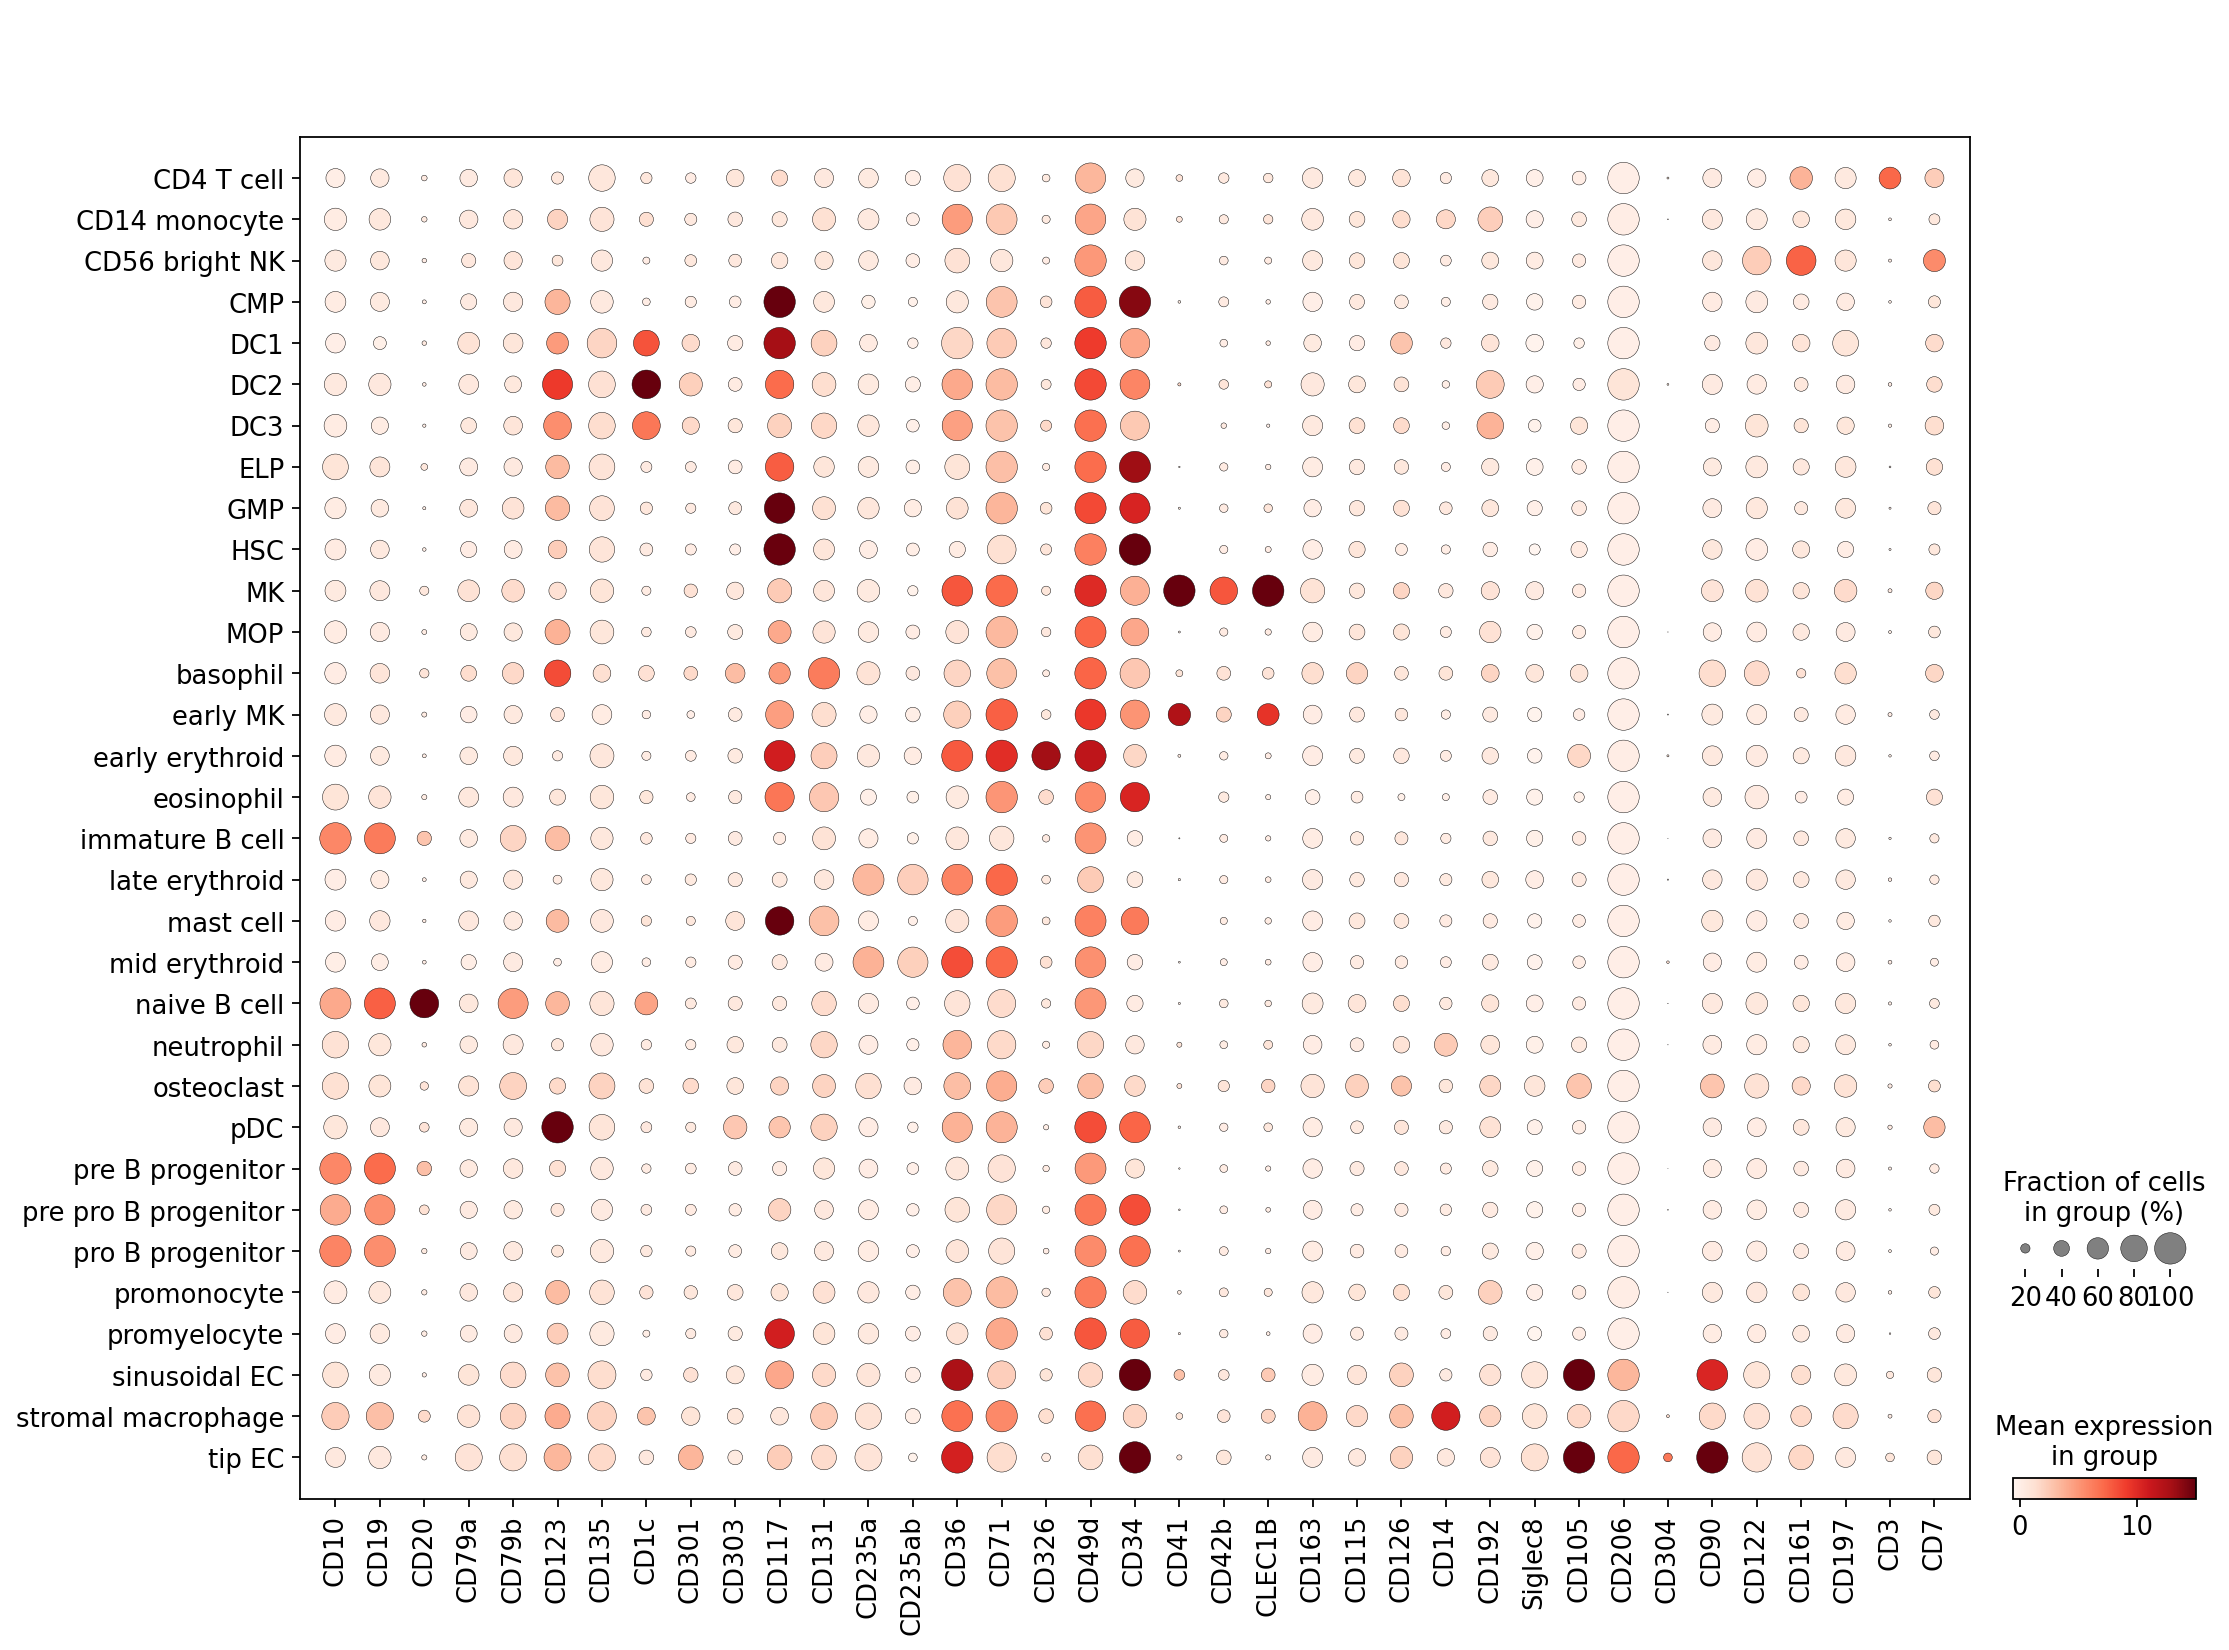

In [87]:
sc.pl.dotplot(DSB_output0, var_names=list(markers["Antibody"]), groupby="cell.labels", 
              save="Fig_protein_MNCs_FBM_dotplot.pdf", vmax=15)

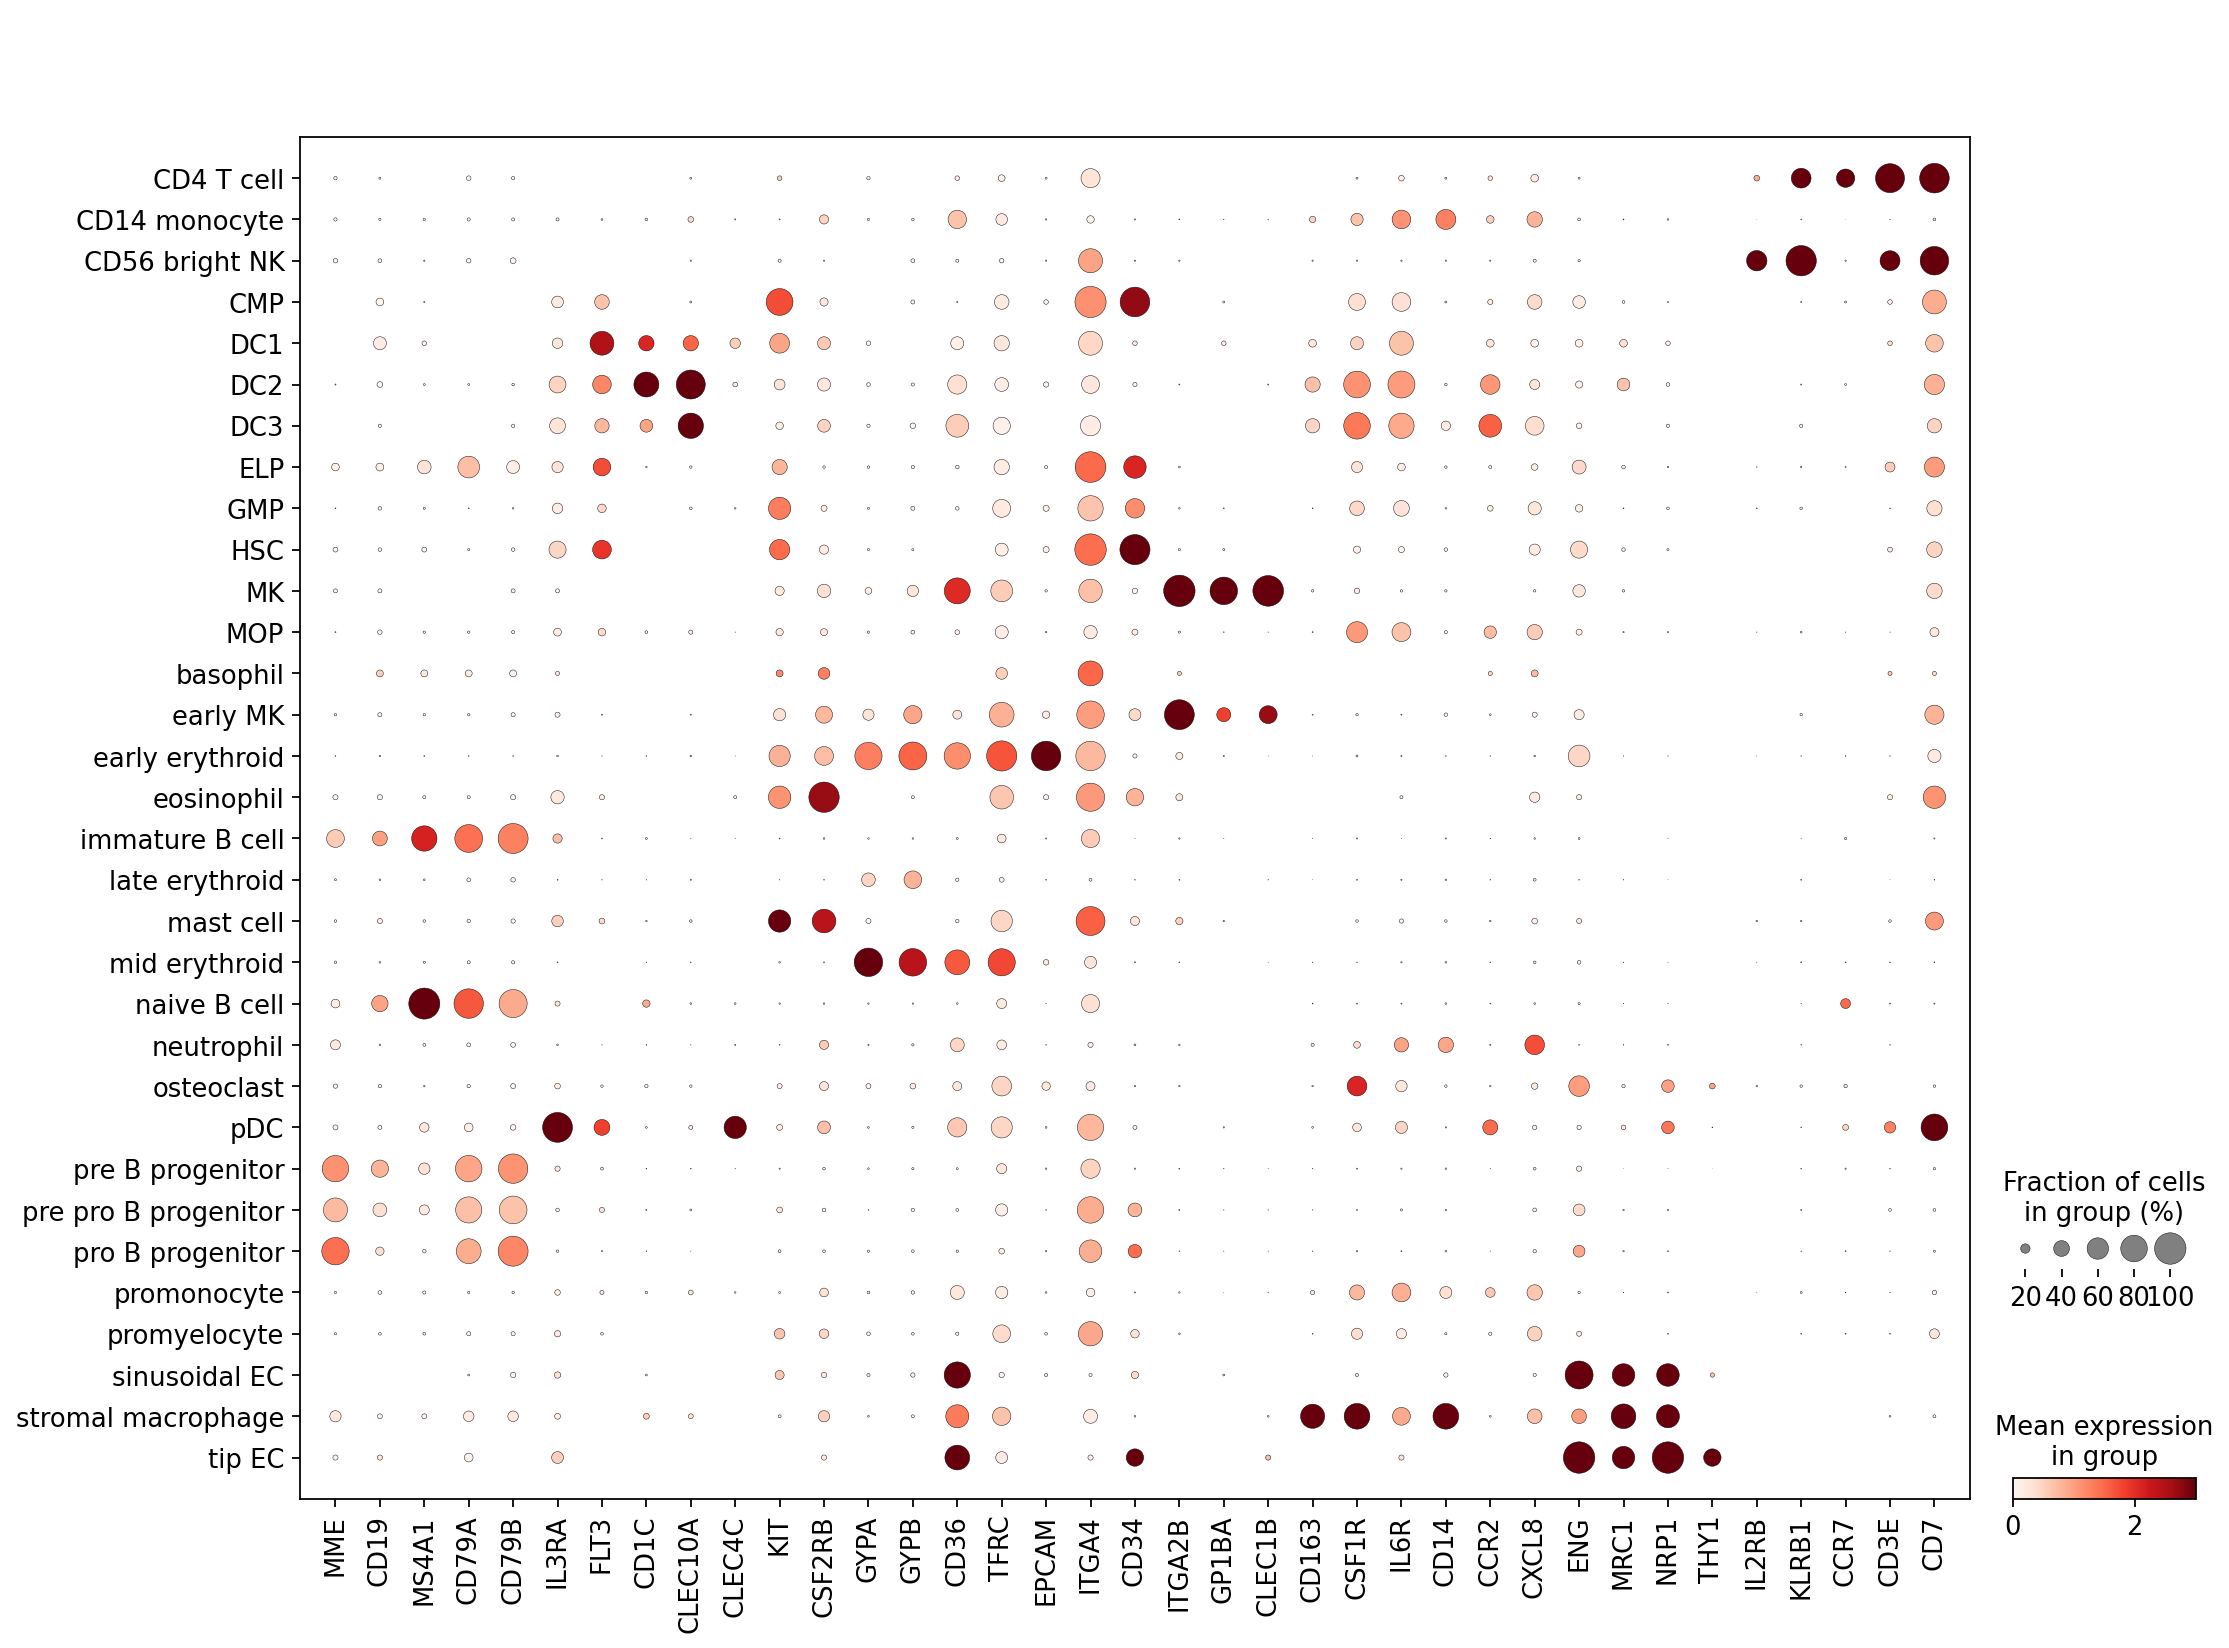

In [88]:
sc.pl.dotplot(mrna_adata, var_names=list(markers["Gene"]), groupby="cell.labels", 
              save="Fig_mrna_MNCs_FBM_dotplot.pdf", vmax=3)

### Second attempt, making the list shorter

In [89]:
markers = pd.read_csv('CITEseq_MNC_lists_for_fig.csv',  sep=";")  
markers =pd.DataFrame(markers[["antibody ","gene"]])
cells_order = pd.read_csv('dotplot_cells_order.csv') 
cells_order = pd.DataFrame(cells_order[["cell labels order"]])
cells_order=list(cells_order["cell labels order"])

In [95]:
#adapt the order for figures in both protein and mrna datasets
DSB_output0.obs['cell.labels.sorted'] = DSB_output0.obs['cell.labels'].cat.reorder_categories(cells_order)
mrna_adata.obs['cell.labels.sorted'] = mrna_adata.obs['cell.labels'].cat.reorder_categories(cells_order)

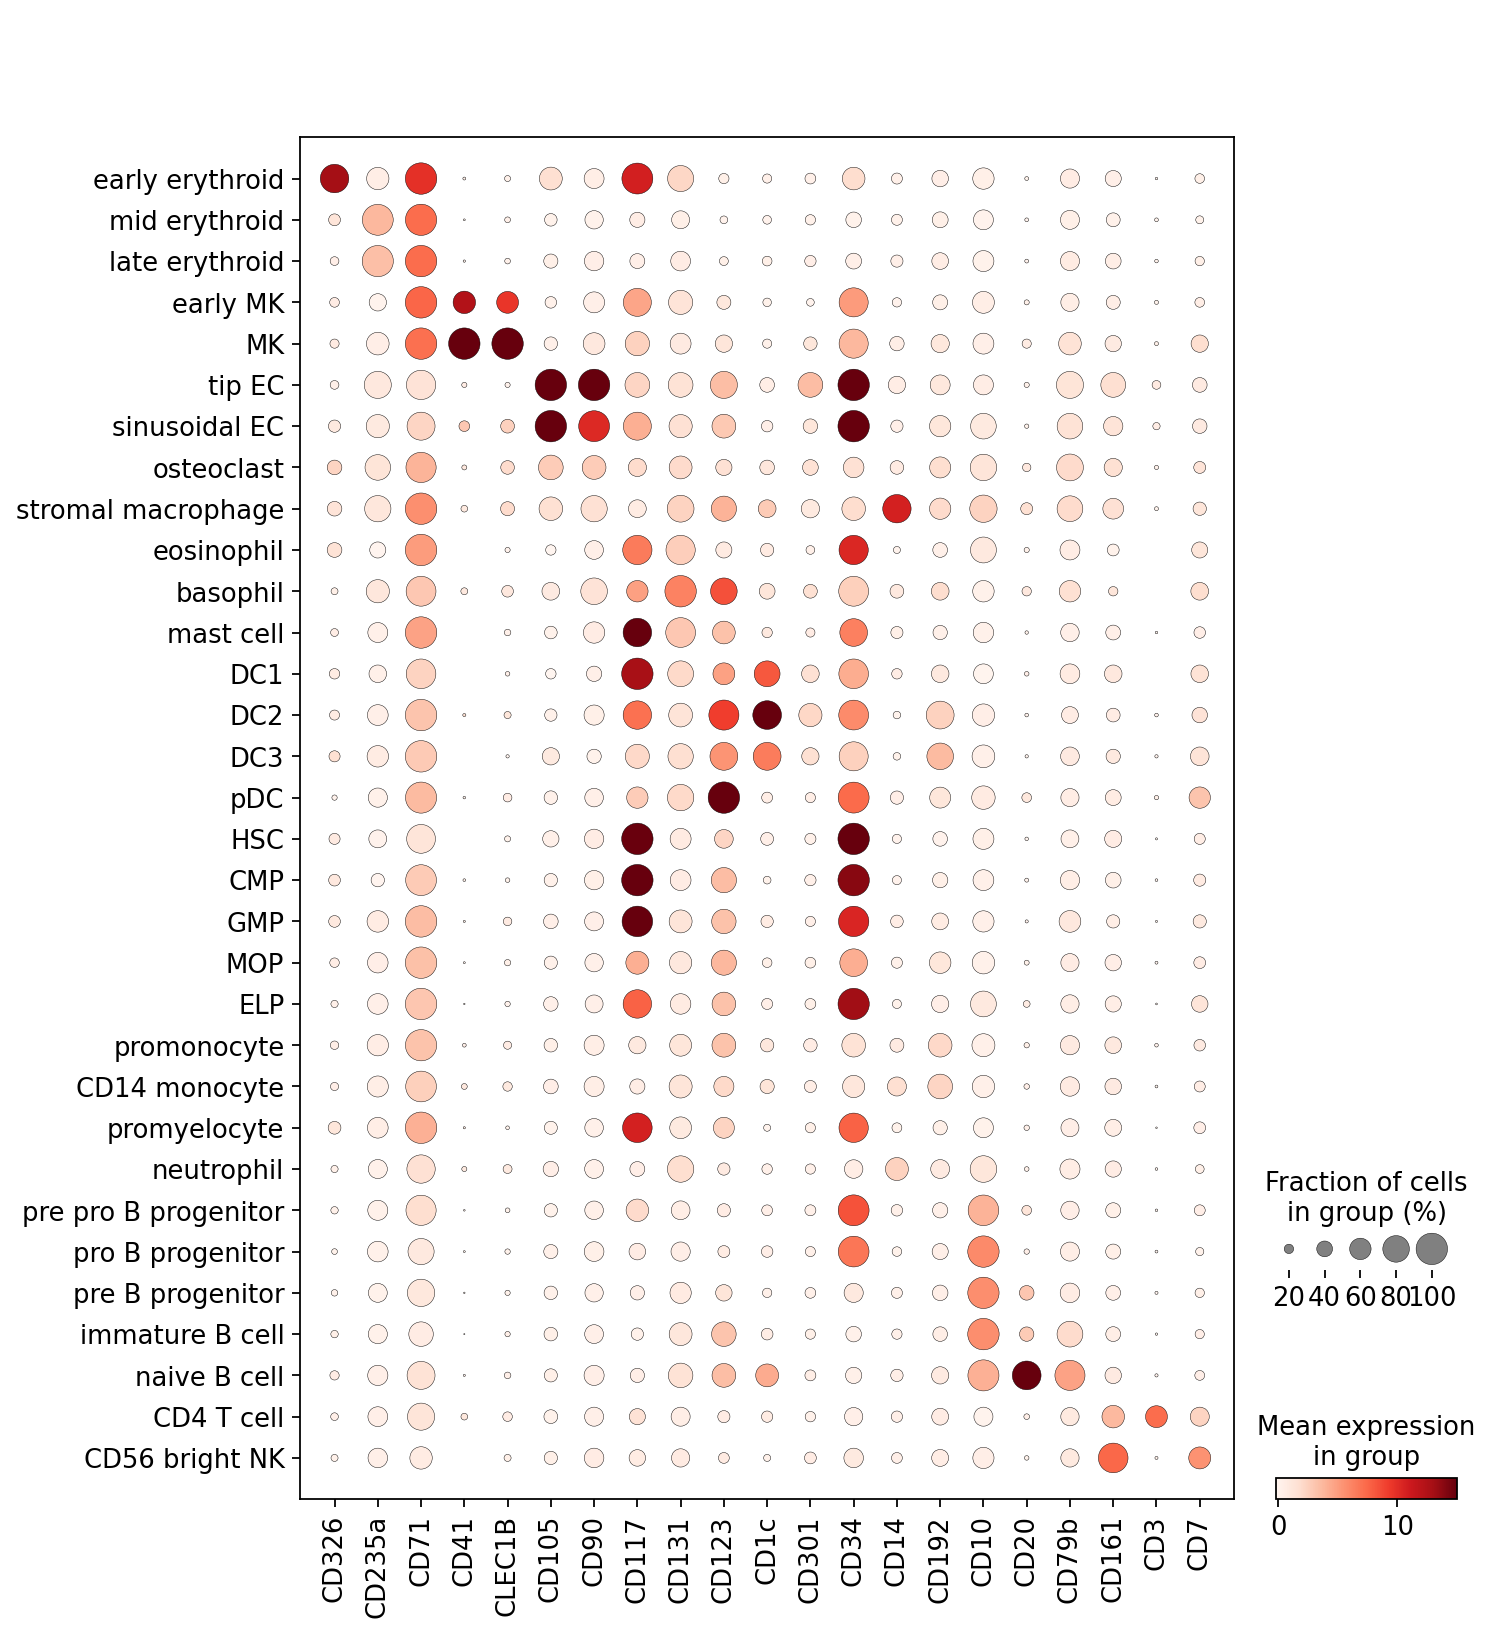

In [102]:
sc.pl.dotplot(DSB_output0, var_names=list(markers["antibody "]), groupby="cell.labels.sorted", vmax=15)

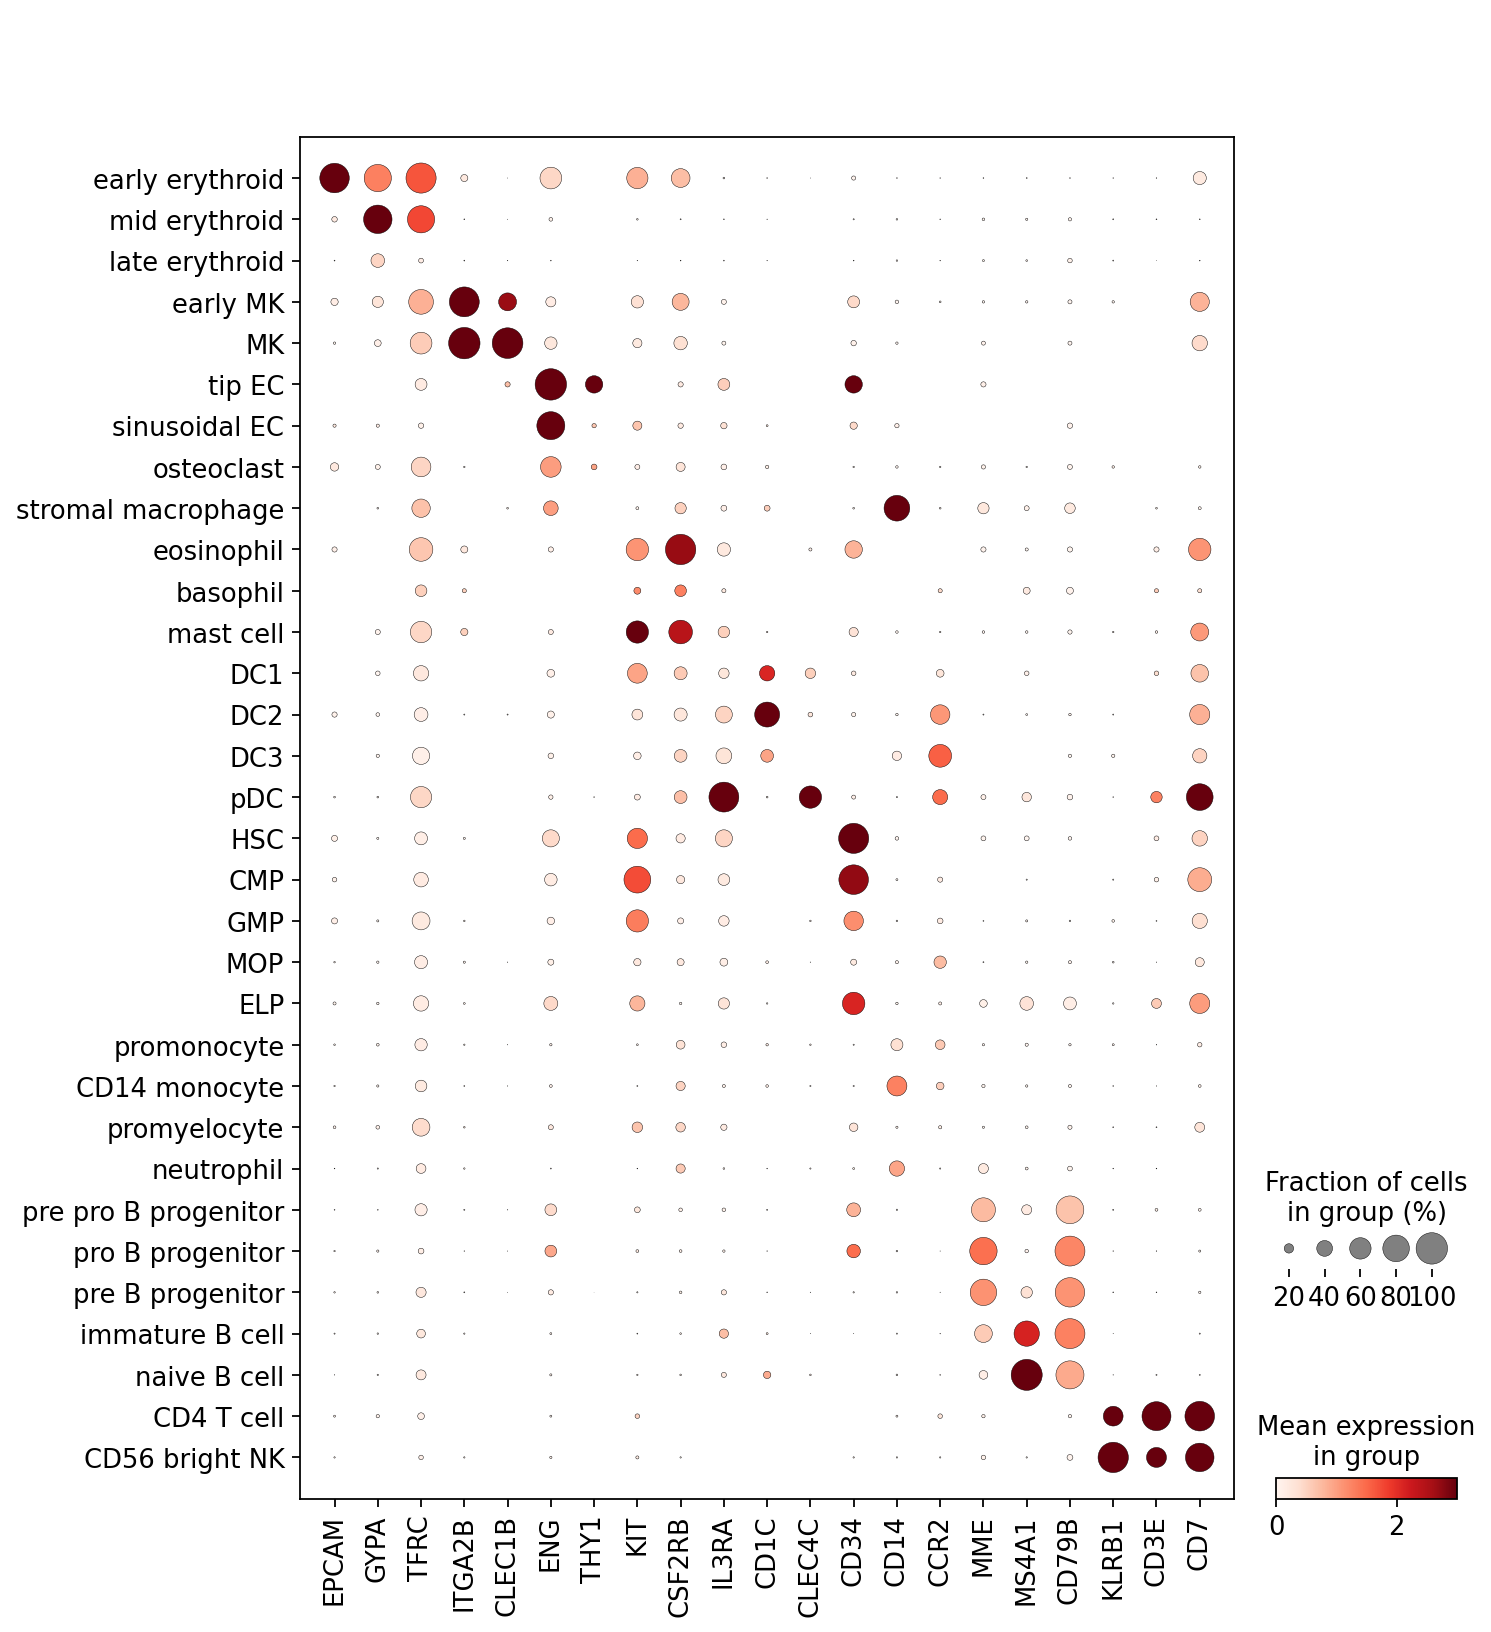

In [103]:
sc.pl.dotplot(mrna_adata, var_names=list(markers["gene"]), groupby="cell.labels.sorted", 
              save="060221_Fig_mrna_MNCs_FBM_dotplot.pdf", vmax=3)

In [201]:
mrna_adata

AnnData object with n_obs × n_vars = 8986 × 36601
    obs: 'souporcell_doublet', 'souporcell_assignment', 'orig.ident', 'lanes', 'sequencing.type', 'sex', 'mad_prd', 'auto_prd', 'is_doublet', 'nUMI', 'nGene', 'percent.mito', 'nUMI_protein', 'nAb', 'leiden', '__is_in_cluster__', 'cell.labels'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'orig.ident_colors', 'pca', 'rank_genes_groups', 'rank_genes_groups_filtered', 'cell.labels_colors'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [202]:
DSB_output0

AnnData object with n_obs × n_vars = 8978 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'pca', 'neighbors', 'umap', 'draw_graph', 'leiden', 'louvain', 'leiden_colors', 'assignment_colors'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'